In [0]:
import keras
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model 
mnist_input = Input(shape=(784,))

In [0]:
hidden = Dense(512)(mnist_input)

In [0]:
model = Model(inputs= mnist_input, outputs= hidden)

# Functional Model for Sequence classification LSTM

In [0]:
import keras
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
import numpy as np

data_dim = 100
additional_data_dim = 5
num_class = 1

# Generate dummy training data
headline_data = np.random.random((100, data_dim))
additional_data  =  np.random.random((100, additional_data_dim))
labels = np.random.random((100, num_class))

In [0]:
# Input Layer
main_input = Input(shape=(100,), dtype='int32', name='main_input')

In [0]:
# embedding layer encode the input sequence into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=100, input_length=100)(main_input)

# LSTM 
lstm_out = LSTM(32)(x)

auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)
auxiliary_input = Input(shape=(5,), name='aux_input')

x = keras.layers.concatenate([lstm_out, auxiliary_input])

# stack three densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# add the logistic regression layer for output

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [0]:
model  = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

In [0]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     51200       main_input[0][0]                 
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           69760       embedding_1[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 5)            0                                            
____________________________________________________________________________________________

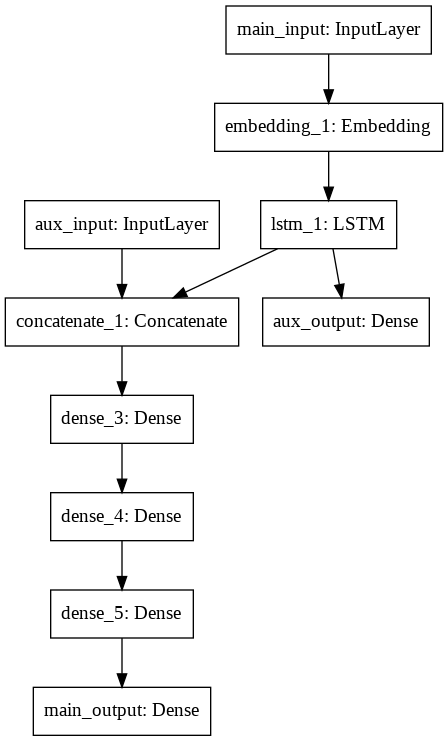

In [0]:
from keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='LSTM functional model.png')
Image.open('LSTM functional model.png')

In [0]:
# model compile
model.compile(optimizer='rmsprop',
              loss={'main_output':'binary_crossentropy', 'aux_output':'binary_crossentropy'},
              loss_weights={'main_output':1., 'aux_output':0.2})

In [0]:
# model train
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output':labels},
          epochs = 50, batch_size = 32)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/50
100/100 [==============================] - 1s 11ms/step - loss: 0.8331 - main_output_loss: 0.6923 - aux_output_loss: 0.6961
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8303 - main_output_loss: 0.6930 - aux_output_loss: 0.6948
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8300 - main_output_loss: 0.6910 - aux_output_loss: 0.6927
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8303 - main_output_loss: 0.6867 - aux_output_loss: 0.6949
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8285 - main_output_loss: 0.6897 - aux_output_loss: 0.6938
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8261 - main_output_loss: 0.6843 - aux_output_loss: 0.6928
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8283 - main_output_loss: 0.6934 - aux_output_loss: 0.6943
Epoch 8/50
100/100 [==============================] - 0s 3ms/

# Functional CNN 

In [0]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D

mnist_input = Input(shape=(28, 28, 1), name='input')

conv1 = Conv2D(128, kernel_size=4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)

conv2 = Conv2D(64, kernel_size=4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)

hidden1 = Dense(64, activation='relu', name='hidden1')(pool2)
output = Dense(10, activation='softmax', name='output')(hidden1)

model = Model(inputs=mnist_input, outputs=output)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 128)       2176      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output (Dense)               (None, 4, 4, 10)          650 

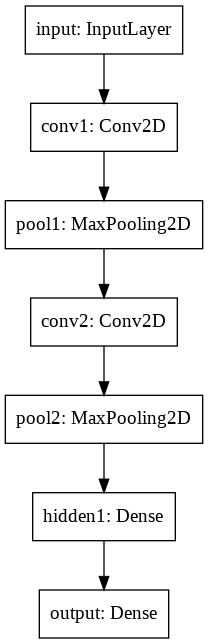

In [0]:
plot_model(model, to_file='CNN_functional_model.png')
Image.open('CNN_functional_model.png')

# CNN shared input Layer 

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 21, 21, 16)   1040        input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
____________________________________________________________________________________________

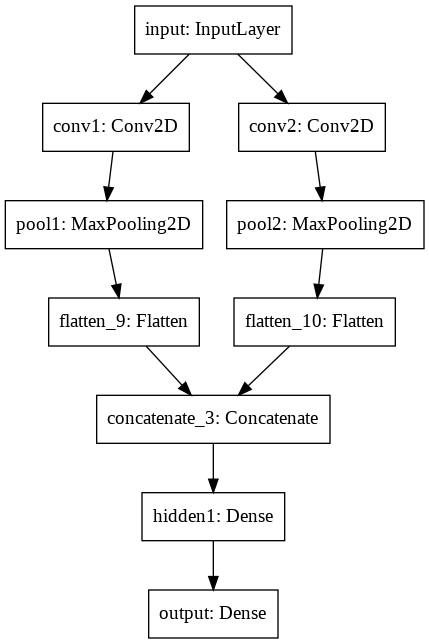

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
from PIL import Image

# 輸入層
mnist_input = Input(shape=(28, 28, 1), name='input')

# 第一個特徵提取層
conv1 = Conv2D(32, kernel_size=4, activation='relu', name='conv1')(mnist_input) # <-- 看這裡
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)
flat1 = Flatten()(pool1)

# 第二個特徵提取層
conv2 = Conv2D(16, kernel_size=8, activation='relu', name='conv2')(mnist_input) # <-- 看這裡
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)

# 把兩個特徵提取層的結果併起來
merge = concatenate([flat1, flat2])

# 進行全連結層
hidden1 = Dense(64, activation='relu', name='hidden1')(merge)

# 輸出層
output = Dense(10, activation='softmax', name='output')(hidden1)

# 以Model來組合整個網絡
model = Model(inputs=mnist_input, outputs=output)

# 打印網絡結構
model.summary()

plot_model(model, to_file='CNN_functional_model.png')
Image.open('CNN_functional_model.png')

# 多輸入模型

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
from PIL import Image

In [0]:
# the first input layer
img_gray_bigsize = Input(shape=(64,64,1), name='img_gray_bigsize') 
conv1 = Conv2D(32, kernel_size=4, activation='relu', name='conv1')(img_gray_bigsize)
pool1 = MaxPool2D(pool_size=(2,2), name='pool1')(conv1)
conv2 = Conv2D(32, kernel_size=4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2,2), name='pool2')(conv2)
flat1 = Flatten()(pool2)

# the second input layer
img_rgb_smallsize = Input(shape=(32,32,3), name='img_rgb_bigsize')
conv2_1 = Conv2D(32, kernel_size=4, activation='relu', name='conv2_1')(img_rgb_smallsize)
pool2_1 = MaxPool2D(pool_size=(2,2), name='pool2_1')(conv2_1)
conv2_2 = Conv2D(32, kernel_size=4, activation='relu', name='conv2_2')(pool2_1)
pool2_2 = MaxPool2D(pool_size=(2,2), name='pool2_2')(conv2_2)
flat2 = Flatten()(pool2_2) 

In [0]:
# 兩個特徵擷取層的結果合併
merge = concatenate([flat1,flat2])

In [0]:
# 全連結層: 即Dense層(keras中)解釋特徵 對特徵做分類
hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
hidden2 = Dense(64, activation='relu', name='hidden2')(hidden1)

In [0]:
# output layer
output = Dense(10, activation='softmax', name='output')(hidden2)

In [0]:
model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize],
              outputs=output)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_bigsize (InputLayer)    (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv2_1 (Conv2D)                (None, 29, 29, 32)   1568        img_rgb_bigsize[0][0]            
____________________________________________________________________________________________

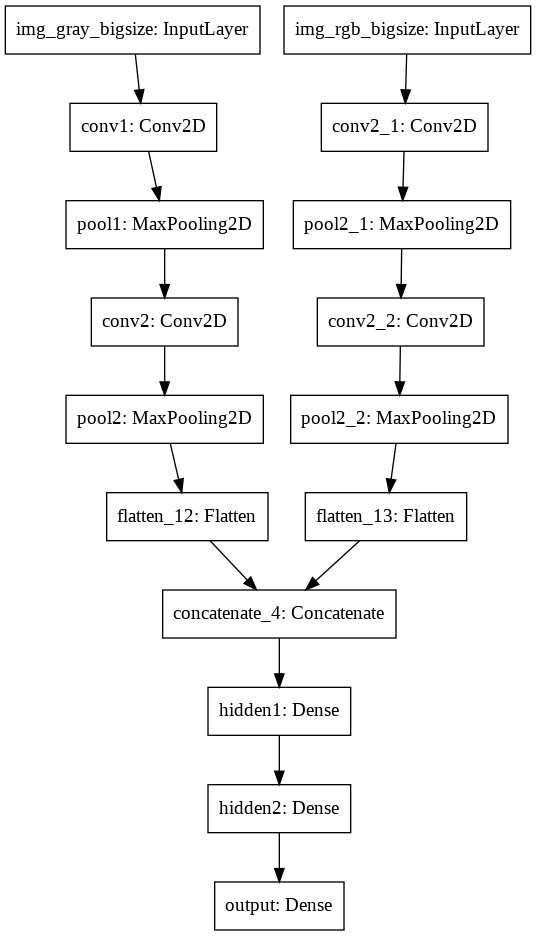

In [0]:
model.summary()
plot_model(model, to_file='multiple_inputs.png')
Image.open('multiple_inputs.png')

# 多輸出模型

In [0]:
# 同一個特徵都是784 timesteps, 我們來對序列進行分類, 輸出有相同長度的新序列
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
from keras.layers.wrappers import TimeDistributed
from PIL import Image

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mnist_input (InputLayer)        (None, 784, 1)       0                                            
__________________________________________________________________________________________________
extract (LSTM)                  (None, 784, 64)      16896       mnist_input[0][0]                
__________________________________________________________________________________________________
class1 (LSTM)                   (None, 32)           12416       extract[0][0]                    
__________________________________________________________________________________________________
class2 (Dense)                  (None, 32)           1056        class1[0][0]                     
____________________________________________________________________________________________

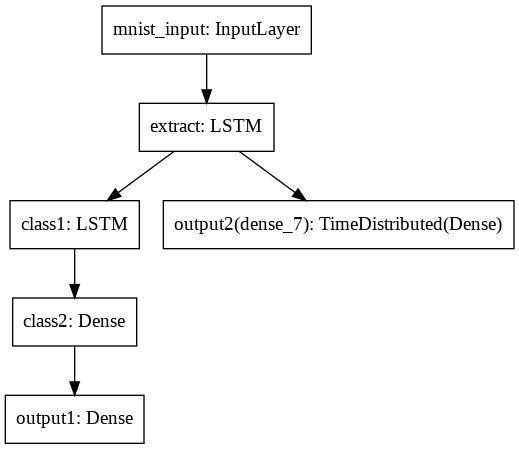

In [0]:
# input layer
# 把每一個相素想成 是一個序列有前後關係的time_steps
mnist_input = Input(shape=(784,1), name='mnist_input') 

# 特徵擷取層
extract = LSTM(64, return_sequences=True, name='extract')(mnist_input)

# 分類輸出
class1 = LSTM(32, name='class1')(extract)
class2 = Dense(32, activation='relu', name='class2')(class1)
output1 = Dense(10, activation='softmax', name='output1')(class2)

# 序列輸出
output2 = TimeDistributed(Dense(10, activation='softmax'), name='output2')(extract)

# model.compile
model = Model(inputs=mnist_input,
              outputs=[output1, output2])

# 打印

model.summary()
plot_model(model, to_file='multiple_outputs.png')
Image.open('multiple_outputs.png')